<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/2d_no_overlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo




In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle
from google.colab import files

import matplotlib.patches as patches

#from google.colab import drive
#drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.2

In [4]:
data = {}
N = 10
rects = range(N)

for rec in rects:
  data[rec,'l']= random.randint(1,7)
  data[rec,'w']= random.randint(1,5)


data

{(0, 'l'): 7,
 (0, 'w'): 1,
 (1, 'l'): 5,
 (1, 'w'): 2,
 (2, 'l'): 2,
 (2, 'w'): 3,
 (3, 'l'): 3,
 (3, 'w'): 2,
 (4, 'l'): 3,
 (4, 'w'): 5,
 (5, 'l'): 7,
 (5, 'w'): 4,
 (6, 'l'): 6,
 (6, 'w'): 4,
 (7, 'l'): 2,
 (7, 'w'): 4,
 (8, 'l'): 1,
 (8, 'w'): 2,
 (9, 'l'): 2,
 (9, 'w'): 4}

{(0, 'l'): 7,
 (0, 'w'): 1,
 (1, 'l'): 5,
 (1, 'w'): 2,
 (2, 'l'): 2,
 (2, 'w'): 3,
 (3, 'l'): 3,
 (3, 'w'): 2,
 (4, 'l'): 3,
 (4, 'w'): 5,
 (5, 'l'): 7,
 (5, 'w'): 4,
 (6, 'l'): 6,
 (6, 'w'): 4,
 (7, 'l'): 2,
 (7, 'w'): 4,
 (8, 'l'): 1,
 (8, 'w'): 2,
 (9, 'l'): 2,
 (9, 'w'): 4}

In [24]:
KOLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
            "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
            "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
            "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
            "#8c6d31", "#9c9ede", "#637939", "#e7cb94", "#b5cf6b",
            "#cedb9c", "#c7c7c7", "#bd9e39", "#e7969c", "#7b4173"]

In [21]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
Lmax = 20
Wmax = 10
x = {i:model.NewIntVar(0,Lmax-data[i,'l']  , f"X_{i}") for i in rects}
y = {i:model.NewIntVar(0,Wmax-data[i,'w']  , f"Y_{i}") for i in rects}


X_list = [model.NewIntervalVar(x[i],data[i,'l'] , x[i]+data[i,'l'], f"Xinterval_{i}") for i in rects]
Y_list = [model.NewIntervalVar(y[i],data[i,'w'] , y[i]+data[i,'w'], f"Yinterval_{i}") for i in rects]
model.AddNoOverlap2D(X_list, Y_list)

status = solver.Solve(model)
if status == cp_model.FEASIBLE:
  print("feasible")
elif status == cp_model.OPTIMAL:
  print("optimal")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")




optimal


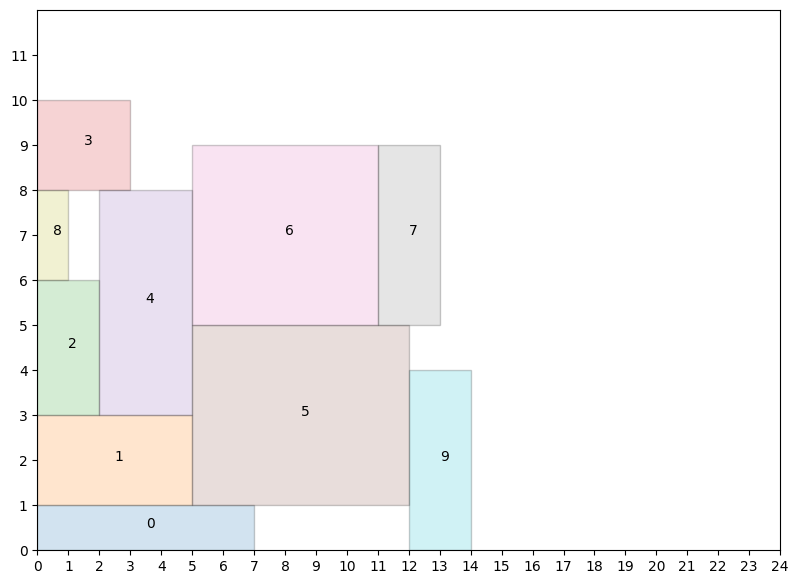

In [32]:
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle
plt.figure(figsize=(8,6))

for i in rects:
  x0,y0 = solver.value(x[i]), solver.value(y[i])
  plt.gca().add_patch(Rectangle((x0,y0), data[i,'l'],data[i,'w'],linewidth=1,edgecolor='k',facecolor=KOLORS[i], alpha =0.2))
  plt.text(x0+0.5*data[i,'l'],y0+0.5*data[i,'w'], s= str(i))


# Create a figure

# Set limits
plt.xlim(0, 22)
plt.ylim(0, 12)
plt.tight_layout()
plt.xticks(range(25))
plt.yticks(range(12))

# Show the plot
plt.show()